# ** Порівняння лінійної на поліноміальної регресій**

* Імпортуємо бібліотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

* Зчитуємо файл з датасетом:

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Firearms.csv')
df.head()

,Unnamed: 0,Country,Civilian firearms per 100 persons,GNI,Quality of Life Index,Crime Index,Income group,Region,Subregion,Population
0,0,Montenegro,39.1,7900.0,134.85,41.10,Upper middle income,Europe,Southern Europe,626000
1,1,Serbia,39.1,7400.0,117.23,38.29,Upper middle income,Europe,Southern Europe,6946000
2,2,Canada,34.7,43400.0,160.38,42.95,High income,Americas,North America,36626000
3,3,Uruguay,34.7,15800.0,122.26,51.44,High income,Americas,South America,3457000
4,4,Cyprus,34.7,26100.0,147.10,32.12,High income,Americas,South America,3457000


* Подивимся на кореляцію даних:

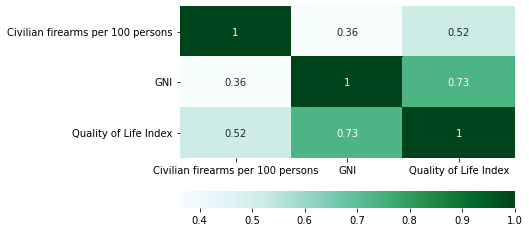

In [3]:
dataset = df.iloc[:, 2:6] 

datasetX = df.iloc[:, 2:5]
datasetX.corr()
sns.heatmap(datasetX.corr(),annot=True, cbar_kws={"orientation": "horizontal"}, cmap = 'BuGn') 

* Побудуємо графіки розсіювання:

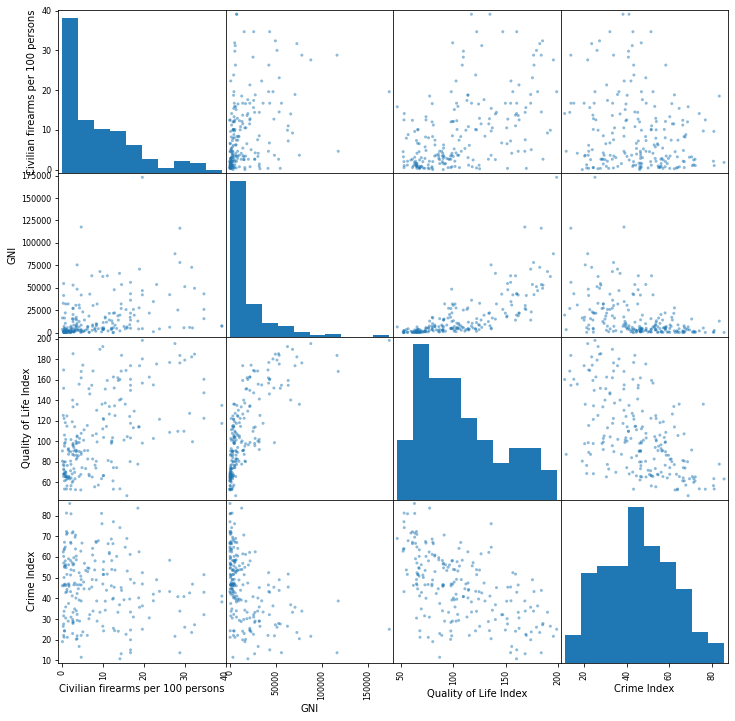

In [4]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

* Побудуємо діаграму розмаху для значень "Civilian firearms per 100 persons", подивимося чи є викиди:

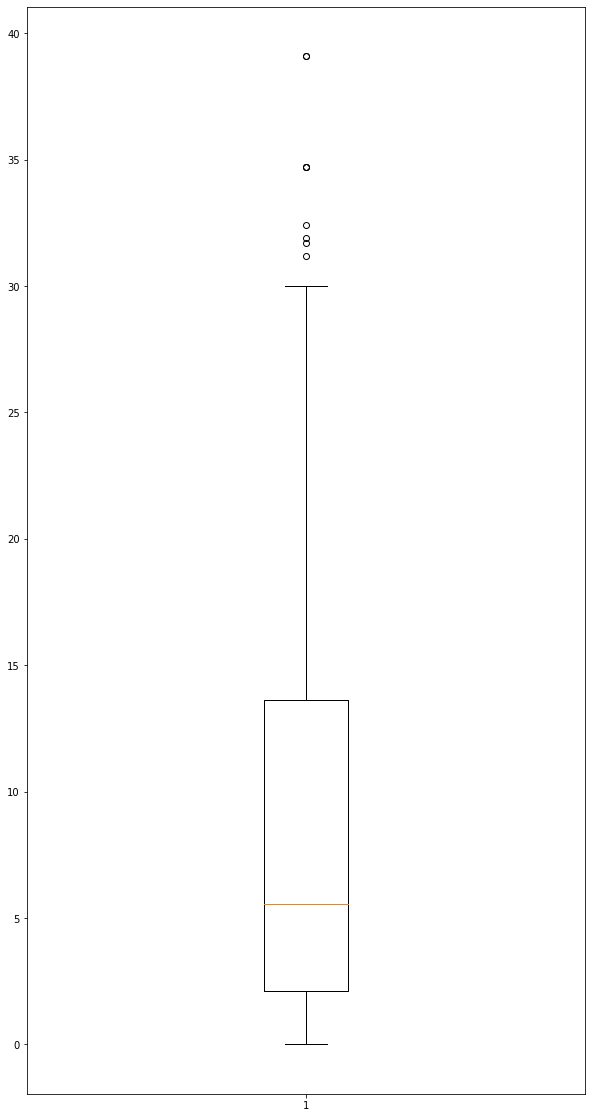

In [5]:
plt.figure(figsize=(10, 20))

plt.boxplot(dataset[dataset['Civilian firearms per 100 persons'].notnull()]['Civilian firearms per 100 persons'])

plt.show()

* За допомогою критерію Граббса перевірим гіпотезу про те, що максимальне значення може бути викидом:

In [6]:
def get_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    cr_value = numerator / denominator
    return cr_value

def grubbs_test(data, alpha=0.05):
    g_calc = np.abs(data - np.mean(data)).max() / np.std(data)
    g_cr = get_critical_value(len(data), alpha)
    return g_calc, g_cr


print('(Значення критерію Граббса, Kритичне значення)')
print()
print(grubbs_test(dataset['Civilian firearms per 100 persons']), ' - Civilian firearms per 100 persons')
print(grubbs_test(dataset['Quality of Life Index']), ' - Quality of Life Index')

(Значення критерію Граббса, Kритичне значення)

(3.3284893687214945, 3.6172664862161823)  - Civilian firearms per 100 persons
(2.389205207183134, 3.6172664862161823)  - Quality of Life Index


* Імпортуємо важливі бібліотеки та вказуємо дані для регресії:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics

Y1 = dataset['Crime Index']
X1 = dataset[['Quality of Life Index','Civilian firearms per 100 persons', 'GNI']]

* Визначаємо тренувальний та тестовий сет:

In [78]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.33, random_state = 0)

* Виділяємо всі види регресій:

In [80]:
p1 = 'Quality of Life Index'
p2 = 'Civilian firearms per 100 persons'
p3 = 'GNI'

linear = []

linear.append(LinearRegression().fit(X1_train[p1].to_numpy().reshape(-1,1), Y1_train))
linear.append(LinearRegression().fit(X1_train[p2].to_numpy().reshape(-1,1), Y1_train))
linear.append(LinearRegression().fit(X1_train[p3].to_numpy().reshape(-1,1), Y1_train))
linear.append(LinearRegression().fit(X1_train[[p1, p2]].values, Y1_train.values))
linear.append(LinearRegression().fit(X1_train[[p1, p3]].values, Y1_train.values))
linear.append(LinearRegression().fit(X1_train[[p2, p3]].values, Y1_train.values))
linear.append(LinearRegression().fit(X1_train[[p1, p2, p3]].values, Y1_train.values))

P = [p1, p2, p3, [p1, p2], [p1, p3], [p2, p3], [p1, p2, p3]]

polynomial = []

for i in range(7):
    polynomial.append(make_pipeline(PolynomialFeatures(degree = 2), LinearRegression()))
    if i < 3: 
        polynomial[i].fit(X1_train[P[i]].to_numpy().reshape(-1,1), Y1_train)
    else:
        polynomial[i].fit(X1_train[P[i]].values, Y1_train.values)


In [81]:
prediction = []

prediction.append(linear[0].predict(X1_test[p1].to_numpy().reshape(-1,1)))
prediction.append(linear[1].predict(X1_test[p2].to_numpy().reshape(-1,1)))
prediction.append(linear[2].predict(X1_test[p3].to_numpy().reshape(-1,1)))
prediction.append(linear[3].predict(X1_test[[p1, p2]].values))
prediction.append(linear[4].predict(X1_test[[p1, p3]].values))
prediction.append(linear[5].predict(X1_test[[p2, p3]].values))
prediction.append(linear[6].predict(X1_test[[p1, p2, p3]].values))


prediction.append(polynomial[0].predict(X1_test[p1].to_numpy().reshape(-1,1)))
prediction.append(polynomial[1].predict(X1_test[p2].to_numpy().reshape(-1,1)))
prediction.append(polynomial[2].predict(X1_test[p3].to_numpy().reshape(-1,1)))
prediction.append(polynomial[3].predict(X1_test[[p1, p2]].values))
prediction.append(polynomial[4].predict(X1_test[[p1, p3]].values))
prediction.append(polynomial[5].predict(X1_test[[p2, p3]].values))
prediction.append(polynomial[6].predict(X1_test[[p1, p2, p3]].values))

* Порахуємо середньоквадратичну помилку, коєфіціент детермінації та інші показники:

In [82]:
from sklearn import metrics

meanAbErr = []
meanSqErr = []
rootMeanSqErr = []
r2 = []

for i in range(len(prediction)):
  Y_pred = prediction[i]
  meanAbErr.append(metrics.mean_absolute_error(Y1_test, Y_pred))
  meanSqErr.append(metrics.mean_squared_error(Y1_test, Y_pred))
  rootMeanSqErr.append(np.sqrt(metrics.mean_squared_error(Y1_test, Y_pred)))
  r2.append(metrics.r2_score(Y1_test, Y_pred))


print('Linear R2 :', r2[0:7]) # R squared
print('Polynomial R2 :', r2[7:14])
print('-----')
print('Linear MSE:', meanSqErr[0:7]) # Mean Square Error
print('Polynomial MSE:', meanSqErr[7:14])
print('-----')
print('Linear MAE:', meanAbErr[0:7]) # Mean Absolute Error
print('Polynomial MAE:', meanAbErr[7:14])
print('-----')
print('Linear RMSE:', rootMeanSqErr[0:7]) # Root Mean Square Error
print('Polynomial RMSE:', rootMeanSqErr[7:14])

Linear R2 : [0.2914530224034019, 0.023284316586893783, 0.17641543231373902, 0.31918026031256685, 0.29337662042221635, 0.17216412702224426, 0.32109625726433977]
Polynomial R2 : [0.3040927127863252, 0.013376365057266248, 0.08496212236531431, 0.34975469137072057, 0.30650310490832455, 0.06232550421445637, 0.35568310275756665]
-----
Linear MSE: [198.71898285712652, 273.92953930425114, 230.98240873538634, 190.94260572340906, 198.17949083498652, 232.1747292025579, 190.40524549543213]
Polynomial MSE: [195.17405712045428, 276.708321957229, 256.63139081631107, 182.36770521092564, 194.49803889454176, 262.98005346888783, 180.70502381081755]
-----
Linear MAE: [11.397193287107989, 13.375848237329016, 12.190026621726103, 11.270914904089583, 11.41380887499612, 12.21400841238889, 11.311684676171001]
Polynomial MAE: [11.267558835965247, 13.483383678103136, 12.325479763687204, 10.887112490971226, 11.090806766475813, 12.449947126631685, 10.950325992229018]
-----
Linear RMSE: [14.096772072255638, 16.550816

* Провізуалізуємо порівняння середньоквадратичної помилки лінійної та поліноміальної регрессій:

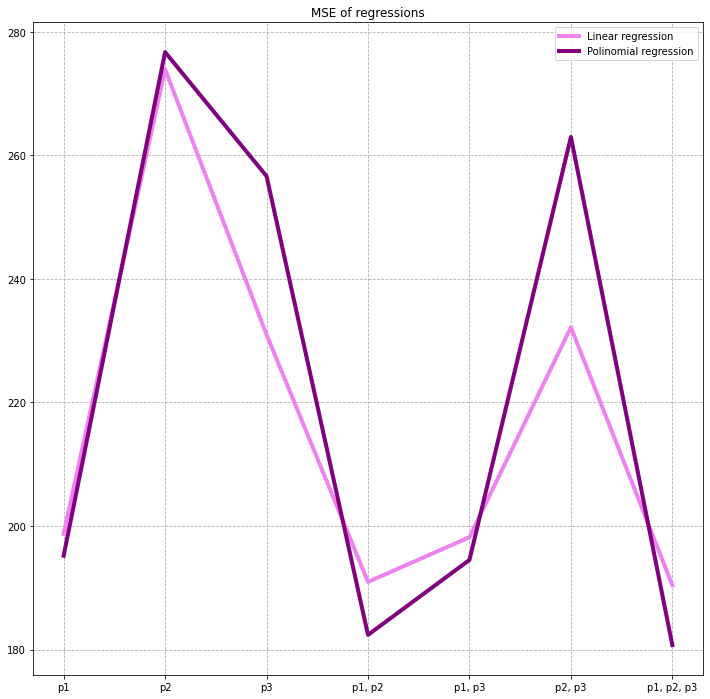

In [83]:
linear_meanSqErr = meanSqErr[0:7]
poly_meanSqErr = meanSqErr[7:14]

labels = ['p1', 'p2', 'p3', 'p1, p2', 'p1, p3', 'p2, p3', 'p1, p2, p3']
plt.figure(figsize=(12,12))  
plt.plot(labels, linear_meanSqErr, color = 'violet', linewidth = 4)
plt.plot(labels, poly_meanSqErr, color = 'purple', linewidth = 4)
plt.legend(['Linear regression', 'Polinomial regression'])
plt.title("MSE of regressions")
plt.grid(linestyle='--')
plt.show()


* Знайдемо найкращу модель:

In [84]:
min_i = np.argmin(meanSqErr)
min = meanSqErr[min_i]

if (min_i < 7):
    print(f"linear model by {P[min_i]} params,  i = {min_i}")
    print(f"MSE = {meanSqErr[min_i]}")
else:
    print(f"polynomial model by {P[min_i - 7]} params, i = {min_i}")
    print(f"MSE = {meanSqErr[min_i]}")

polynomial model by ['Quality of Life Index', 'Civilian firearms per 100 persons', 'GNI'] params, i = 13
MSE = 180.70502381081755


* Провізуалізуємо отриманий результат:

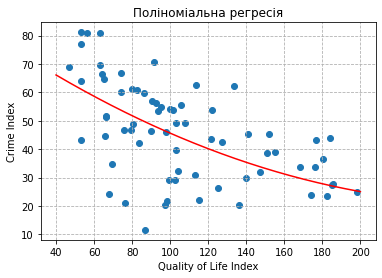

In [86]:
mymodel = np.poly1d(np.polyfit(X1_test["Quality of Life Index"], prediction[13] , 2))

plt.title('Поліноміальна регресія')
plt.scatter(X1_test["Quality of Life Index"], Y1_test)
plt.plot(np.linspace(40, 200, 200), mymodel(np.linspace(40, 200, 200)), color = "red")
plt.xlabel('Quality of Life Index')
plt.ylabel('Crime Index')
plt.grid(linestyle='--')

plt.show()